In [1]:
import pandas as panda
import matplotlib
import numpy as np
from matplotlib import pyplot as plot
from datetime import datetime, date
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score

In [2]:
#dataframe = panda.read_csv("NAS.csv", sep=',', engine='python', parse_dates=['Date'], index_col=['Date'])
dataframe = panda.read_csv("NAS.csv", sep=',', engine='python')

In [3]:
dataframe = dataframe.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)

In [4]:
dataframe['Date'] = panda.to_datetime(dataframe['Date'])
dataframe['Year'] = dataframe['Date'].dt.year
dataframe['Month'] = dataframe['Date'].dt.month
dataframe['Day'] = dataframe['Date'].dt.day
dataframe['Weekday'] = dataframe['Date'].dt.day_name()
encoded_columns = panda.get_dummies(dataframe['Weekday'])
dataframe = dataframe.join(encoded_columns).drop('Weekday', axis=1)
dataframe.index = dataframe['Date']
dataframe = dataframe.drop(['Date'], axis=1)

In [5]:
dataframe

,Adj Close,Year,Month,Day,Friday,Monday,Thursday,Tuesday,Wednesday
Date,,,,,,,,,
2003-12-18,19.139799,2003,12,18,0,0,1,0,0
2003-12-19,18.454201,2003,12,19,1,0,0,0,0
2003-12-22,18.054300,2003,12,22,0,1,0,0,0
2003-12-23,17.425800,2003,12,23,0,0,0,1,0
2003-12-24,NaN,2003,12,24,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
2020-10-12,0.676800,2020,10,12,0,1,0,0,0
2020-10-13,0.600600,2020,10,13,0,0,0,1,0
2020-10-14,0.626000,2020,10,14,0,0,0,0,1


In [6]:
dataframe.shape

(4253, 9)

In [7]:
#Checking for null values
dataframe.isnull().sum()

Adj Close    35
Year          0
Month         0
Day           0
Friday        0
Monday        0
Thursday      0
Tuesday       0
Wednesday     0
dtype: int64

In [8]:
#Remove null values
#Dropping the rows where at least one element is missing
dataframe.dropna(inplace = True)
dataframe.isnull().sum()

Adj Close    0
Year         0
Month        0
Day          0
Friday       0
Monday       0
Thursday     0
Tuesday      0
Wednesday    0
dtype: int64

In [9]:
min_date = dataframe.index.min()
max_date = dataframe.index.max()

print('First date:', min_date)
print('Last date:', max_date)
print('days elapsed: ', max_date-min_date)

First date: 2003-12-18 00:00:00
Last date: 2020-10-16 00:00:00
days elapsed:  6147 days 00:00:00


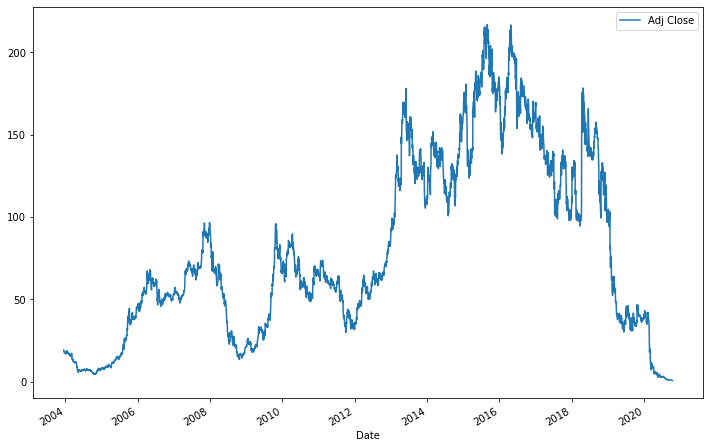

In [10]:
dataframe.plot.line(y=['Adj Close'], figsize=(12,8))

In [11]:
#We are dealing with a continous quantity 
#We want to predict the future value using regression makes more sense.
#If we wanted to predict if the price will increase or decrease we should use classification

x = dataframe.drop('Adj Close', axis=1)
y = dataframe['Adj Close']

x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.1)

In [12]:
x_train.shape, y_train.shape

((3796, 8), (3796,))

In [13]:
x_test.shape, y_test.shape

((422, 8), (422,))

In [14]:
model = LinearRegression(normalize=True)
model.fit(x_train,y_train)

LinearRegression(normalize=True)

In [15]:
print('Traning score: ', model.score(x_train, y_train))

Traning score:  0.24184672922960204


In [16]:
y_pred = model.predict(x_test)

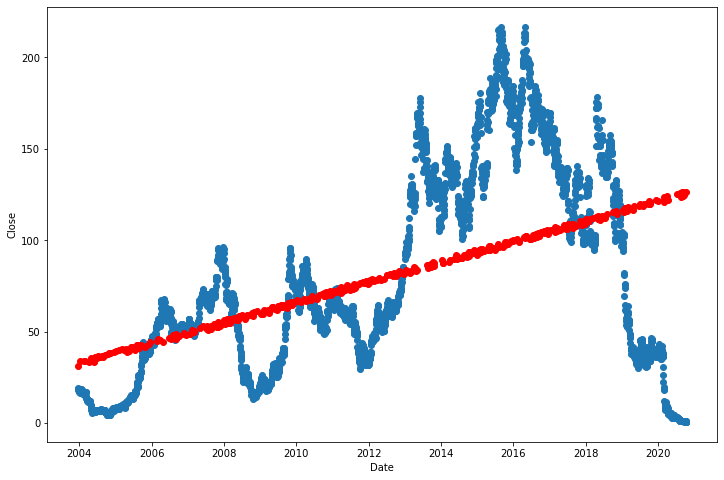

In [19]:
fig, ax = plot.subplots(figsize = (12,8))
plot.scatter(x_train.index, y_train)
plot.scatter(x_test.index,y_pred, color='r')
plot.xlabel('Date')
plot.ylabel('Close')
plot.show()